      time     value
0  0.00000  0.000000
1  0.01001  0.031442
2  0.02002  0.062853
3  0.03003  0.094202
4  0.04004  0.125458


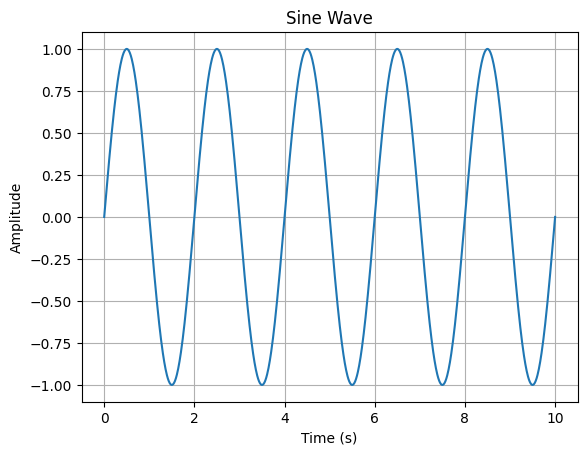

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_points = 1000 
freq = 0.5
amplitude = 1
sampling_rate = 100

# Generate time axis
t = np.linspace(0, num_points / sampling_rate, num_points)

# Create sine wave
y = amplitude * np.sin(2 * np.pi * freq * t)

# Create dataset (DataFrame)
dataset = pd.DataFrame({
    "time": t,
    "value": y
})

print(dataset.head())

# Plot it
plt.plot(t, y)
plt.title("Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


       time     value
2  0.020002  0.368160
3  0.030003  0.535875
4  0.040004  0.684602
5  0.050005  0.809072
6  0.060006  0.904875


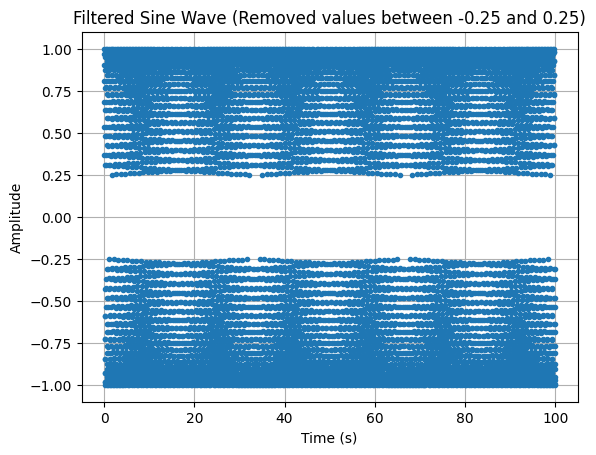

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_points = 10000 
freq = 3
amplitude = 1
sampling_rate = 100

# Generate time axis
t = np.linspace(0, num_points / sampling_rate, num_points)

# Create sine wave
y = amplitude * np.sin(2 * np.pi * freq * t)

# Create original dataset
dataset = pd.DataFrame({
    "time": t,
    "value": y
})

# Remove values in range -0.25 to 0.25
filtered_dataset = dataset[~dataset["value"].between(-0.25, 0.25)]

print(filtered_dataset.head())

# Plot filtered data
plt.plot(filtered_dataset["time"], filtered_dataset["value"], 'o', markersize=3)
plt.title("Filtered Sine Wave (Removed values between -0.25 and 0.25)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


/var/folders/b0/7p6_mqyj5cq28cy9qymdr0t00000gn/T/ipykernel_15501/3315947015.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset["value_filled"] = dataset["value_clean"].fillna(method="ffill").fillna(method="bfill")
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = 

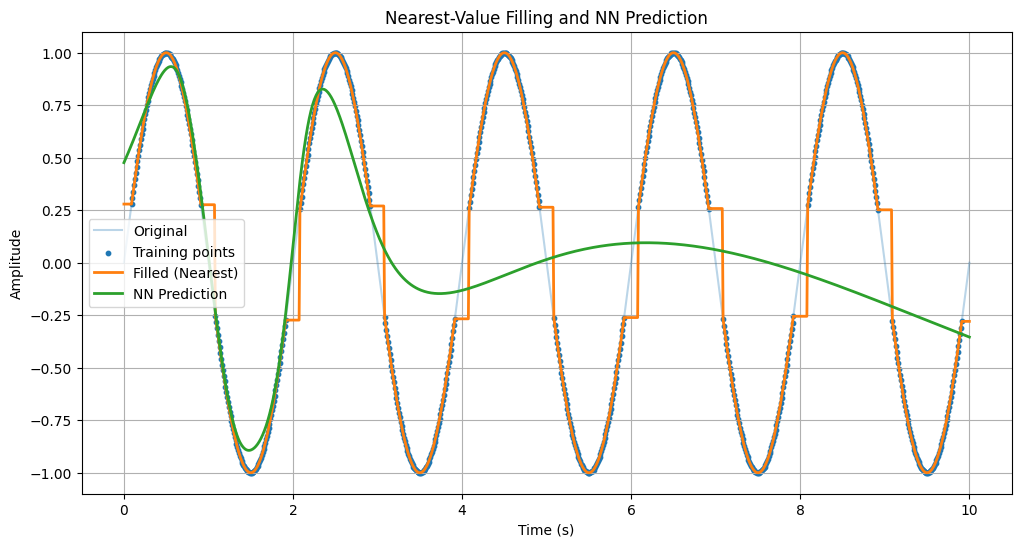

In [15]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# ---------------------------
# 1. Generate sine-wave data
# ---------------------------
num_points = 1000
freq = 0.5
amplitude = 1
sampling_rate = 100

t = np.linspace(0, num_points / sampling_rate, num_points)
y = amplitude * np.sin(2 * np.pi * freq * t)

dataset = pd.DataFrame({
    "time": t,
    "value": y
})

# ------------------------------------------
# 2. Mark points between -0.25 and 0.25
# ------------------------------------------
mask_invalid = dataset["value"].between(-0.25, 0.25)

# Create a column with NaN where values are invalid
dataset["value_clean"] = dataset["value"].where(~mask_invalid, np.nan)

# ------------------------------------------
# 3. Fill invalid points with NEAREST valid
# ------------------------------------------
# first forward fill, then backward fill
dataset["value_filled"] = dataset["value_clean"].fillna(method="ffill").fillna(method="bfill")

# ------------------------------------------
# 4. Build training data (only valid points)
# ------------------------------------------
valid_points = dataset[~mask_invalid]

X_train = valid_points[["time"]]
y_train = valid_points["value"]

# ---------------------------------------
# 5. Train a neural network regressor
# ---------------------------------------
model = MLPRegressor(
    hidden_layer_sizes=(32, 32),
    activation='tanh',
    max_iter=3000,
    random_state=42
)

model.fit(X_train, y_train)

# Predict on full timeline
dataset["prediction"] = model.predict(dataset[["time"]])

# ----------------------
# 6. Plot everything
# ----------------------
plt.figure(figsize=(12, 6))

plt.plot(dataset["time"], dataset["value"], label="Original", alpha=0.3)
plt.scatter(valid_points["time"], valid_points["value"], s=10, label="Training points")
plt.plot(dataset["time"], dataset["value_filled"], label="Filled (Nearest)", linewidth=2)
plt.plot(dataset["time"], dataset["prediction"], label="NN Prediction", linewidth=2)

plt.title("Nearest-Value Filling and NN Prediction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value 

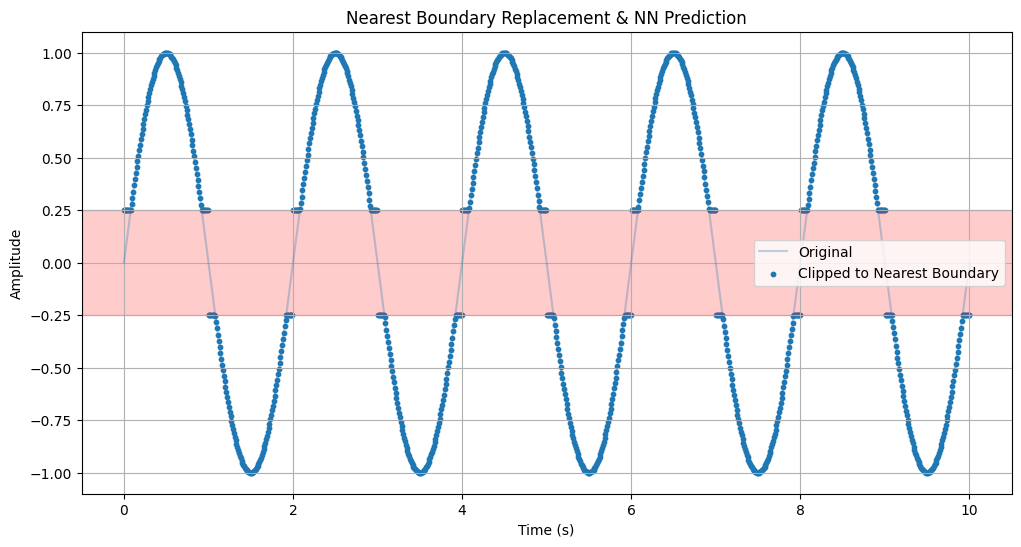

In [50]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# ---------------------------
# 1. Generate sine-wave data
# ---------------------------
num_points = 1000
freq = 0.5
amplitude = 1
sampling_rate = 100

t = np.linspace(0, num_points / sampling_rate, num_points)
y = amplitude * np.sin(2 * np.pi * freq * t)

dataset = pd.DataFrame({
    "time": t,
    "value": y
})

# ------------------------------------------
# 2. Replace values in -0.25..0.25 by nearest boundary
# ------------------------------------------
def clip_to_nearest_boundary(val, lower=-0.25, upper=0.25):
    if lower <= val <= upper:
        # pick closest boundary
        if abs(val - lower) < abs(val - upper):
            return lower
        else:
            return upper
    else:
        return val

SPLIT_RATIO = 0.6
dataset["value_clipped"] = dataset["value"].apply(clip_to_nearest_boundary)
part_one, part_two = train_test_split(
    dataset, 
    test_size=(1.0 - SPLIT_RATIO),
    shuffle=False,
    random_state=42
)

train_data = part_one
X_train = train_data[["time"]]
y_train = train_data["value_clipped"]

test_data = part_two
X_test = test_data[["time"]]
y_test= test_data["value_clipped"]

model = MLPRegressor(
    hidden_layer_sizes=(32, 32),
    activation='tanh',
    max_iter=3000,
    random_state=42
)

model.fit(X_train, y_train)

dataset["prediction"] = model.predict(dataset[["time"]])

plt.figure(figsize=(12, 6))

plt.plot(dataset["time"], dataset["value"], label="Original", alpha=0.3)

plt.scatter(dataset["time"], dataset["value_clipped"], label="Clipped to Nearest Boundary", s=10)

# plt.scatter(dataset["time"], dataset["prediction"], label="NN Prediction", s=10)

plt.title("Nearest Boundary Replacement & NN Prediction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.axhspan(-0.25, 0.25, color='red', alpha=0.2)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


M5 Model Tree MSE: 0.7665
Given MSE: 1.0397


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


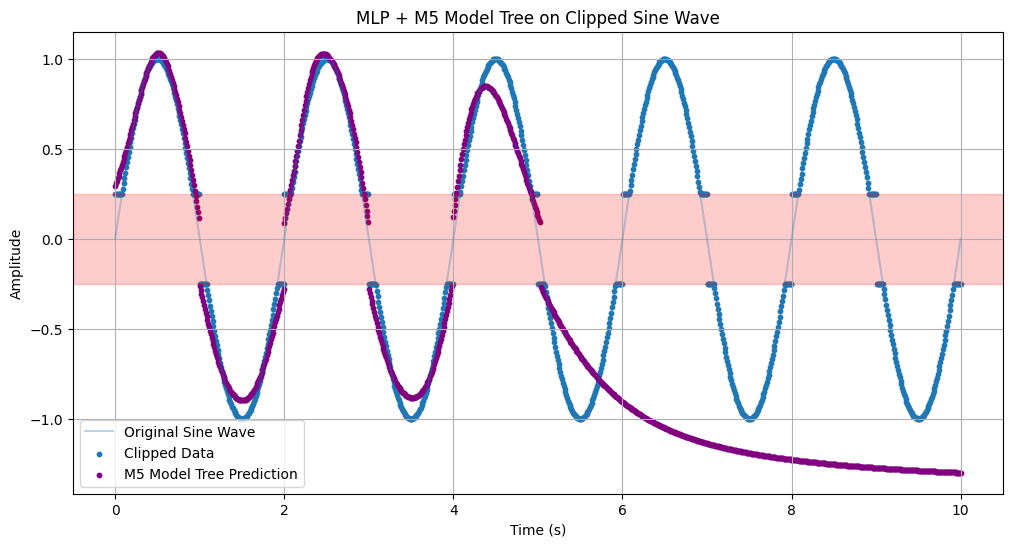

In [45]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from m5py import M5Prime  # M5 model tree

# ---------------------------
# 1. Generate sine-wave data
# ---------------------------
num_points = 1000
freq = 0.5
amplitude = 1
sampling_rate = 100

t = np.linspace(0, num_points / sampling_rate, num_points)
y = amplitude * np.sin(2 * np.pi * freq * t)

dataset = pd.DataFrame({"time": t, "value": y})

# ---------------------------
# 2. Clip values to nearest boundary
# ---------------------------
def clip_to_nearest_boundary(val, lower=-0.25, upper=0.25):
    if lower <= val <= upper:
        return lower if abs(val - lower) < abs(val - upper) else upper
    return val

SPLIT_RATIO = 0.6
dataset["value_clipped"] = dataset["value"].apply(clip_to_nearest_boundary)

train_data, test_data = train_test_split(
    dataset, test_size=(1 - SPLIT_RATIO), shuffle=False, random_state=42
)

X_train = train_data[["time"]]
y_train = train_data["value_clipped"]

X_test = test_data[["time"]]
y_test = test_data["value_clipped"]

# ---------------------------
# 3. Train MLPRegressor
# ---------------------------
mlp = MLPRegressor(hidden_layer_sizes=(32, 32),
                   activation='tanh',
                   max_iter=3000,
                   random_state=42)

mlp.fit(X_train, y_train)

# Make predictions for the whole dataset
dataset["mlp_pred"] = mlp.predict(dataset[["time"]])

# ---------------------------
# 4. Use MLP predictions as input to M5 model tree
# ---------------------------
X_tree = dataset[["mlp_pred"]].values
y_tree = dataset["value_clipped"].values

X_tree_train = X_tree[:len(train_data)]
X_tree_test = X_tree[len(train_data):]
y_tree_train = y_tree[:len(train_data)]
y_tree_test = y_tree[len(train_data):]

# Train M5 model tree
m5 = M5Prime(max_depth=2)
m5.fit(X_tree_train, y_tree_train)

# Predict
y_m5_pred = m5.predict(X_tree)

# Evaluate
mse_m5 = mean_squared_error(y_tree, y_m5_pred)
print(f"M5 Model Tree MSE: {mse_m5:.4f}")
mse_m5 = mean_squared_error(y_tree, X_tree)
print(f"Given MSE: {mse_m5:.4f}")

# ---------------------------
# 5. Visualization
# ---------------------------
plt.figure(figsize=(12, 6))

plt.plot(dataset["time"], dataset["value"], label="Original Sine Wave", alpha=0.3)
plt.scatter(dataset["time"], dataset["value_clipped"], label="Clipped Data", s=10)
plt.scatter(dataset["time"], y_m5_pred, label="M5 Model Tree Prediction", color="purple", s=10)

plt.title("MLP + M5 Model Tree on Clipped Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.axhspan(-0.25, 0.25, color='red', alpha=0.2)  # alpha controls transparency
plt.show()

In [27]:
print(m5.as_pretty_text())

M5Prime (pre-smoothed with constant 15):

X[0] <= 0.007 [friedman_mse=0.506, samples=600] (err=0.16, params=5)
|   LEAF [friedman_mse=0.074, samples=296] : LM1 (err=0.2, params=2)
|   LEAF [friedman_mse=0.085, samples=304] : LM2 (err=0.108, params=2)

LM1: 6.378e-01 * X[0] - 2.655e-01
LM2: 9.350e-01 * X[0] + 8.160e-02



In [53]:
!pip install tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/200.7 MB 65.0 kB/s eta 0:47:22^C
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/200.7 MB 65.0 kB/s eta 0:47:22


/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but M5Prime was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/myenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but M5Prime was fitted with feature names
  warnings.warn(


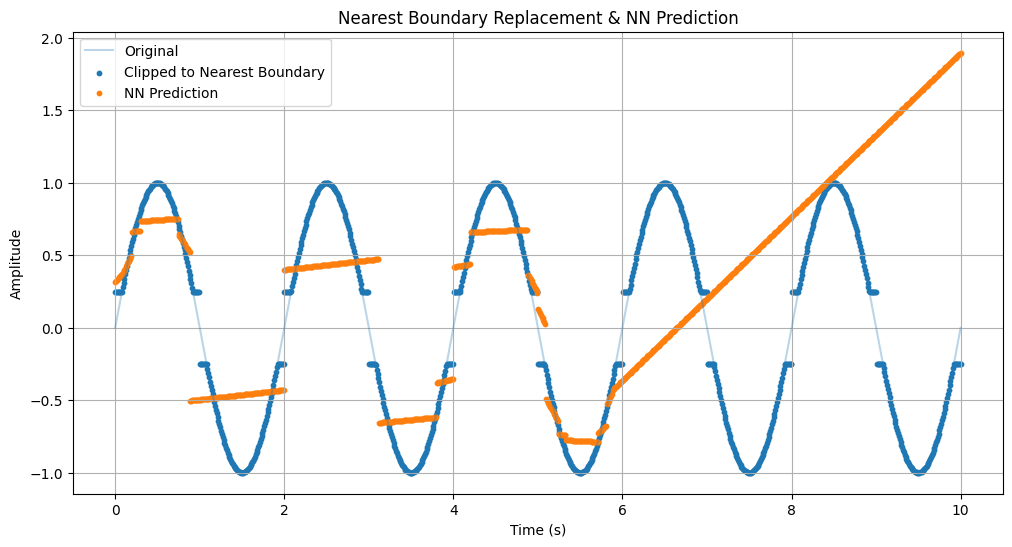

In [9]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# ---------------------------
# 1. Generate sine-wave data
# ---------------------------
num_points = 1000
freq = 0.5
amplitude = 1
sampling_rate = 100

t = np.linspace(0, num_points / sampling_rate, num_points)
y = amplitude * np.sin(2 * np.pi * freq * t)

dataset = pd.DataFrame({
    "time": t,
    "value": y
})

# ------------------------------------------
# 2. Replace values in -0.25..0.25 by nearest boundary
# ------------------------------------------
def clip_to_nearest_boundary(val, lower=-0.25, upper=0.25):
    if lower <= val <= upper:
        # pick closest boundary
        if abs(val - lower) < abs(val - upper):
            return lower
        else:
            return upper
    else:
        return val

SPLIT_RATIO = 0.6
dataset["value_clipped"] = dataset["value"].apply(clip_to_nearest_boundary)
part_one, part_two = train_test_split(
    dataset, 
    test_size=(1.0 - SPLIT_RATIO),
    shuffle=False,
    random_state=42
)

train_data = part_one
X_train = train_data[["time"]]
y_train = train_data["value_clipped"]

test_data = part_two
X_test = test_data[["time"]]
y_test= test_data["value_clipped"]

model = M5Prime(max_depth=5)

model.fit(X_train, y_train)

dataset["prediction"] = model.predict(dataset[["time"]])

plt.figure(figsize=(12, 6))

plt.plot(dataset["time"], dataset["value"], label="Original", alpha=0.3)

plt.scatter(dataset["time"], dataset["value_clipped"], label="Clipped to Nearest Boundary", s=10)

plt.scatter(dataset["time"], dataset["prediction"], label="NN Prediction", s=10)

plt.title("Nearest Boundary Replacement & NN Prediction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
# Example usage
model = M5Prime()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


NameError: name 'X_train' is not defined

Epoch 50, NLL Loss: 0.2669
Epoch 100, NLL Loss: 0.0339
Epoch 150, NLL Loss: -0.0842
Epoch 200, NLL Loss: -0.1821
Epoch 250, NLL Loss: -0.2891
Epoch 300, NLL Loss: -0.3269
Epoch 350, NLL Loss: -0.4298
Epoch 400, NLL Loss: -0.4290
Epoch 450, NLL Loss: -0.5566
Epoch 500, NLL Loss: -0.6049
Epoch 550, NLL Loss: -0.6233
Epoch 600, NLL Loss: -0.6831
Epoch 650, NLL Loss: -0.6929
Epoch 700, NLL Loss: -0.7625
Epoch 750, NLL Loss: -0.7545
Epoch 800, NLL Loss: -0.8377
Epoch 850, NLL Loss: -0.6648
Epoch 900, NLL Loss: -0.5319
Epoch 950, NLL Loss: -0.8148
Epoch 1000, NLL Loss: -0.7141
Epoch 1050, NLL Loss: -0.9003
Epoch 1100, NLL Loss: -0.7964
Epoch 1150, NLL Loss: -0.7846
Epoch 1200, NLL Loss: -0.8690
Epoch 1250, NLL Loss: -0.9379
Epoch 1300, NLL Loss: -0.9254
Epoch 1350, NLL Loss: -0.9281
Epoch 1400, NLL Loss: -0.9300
Epoch 1450, NLL Loss: -0.8966
Epoch 1500, NLL Loss: -0.9512
Epoch 1550, NLL Loss: -0.8701
Epoch 1600, NLL Loss: -0.8948
Epoch 1650, NLL Loss: -0.8614
Epoch 1700, NLL Loss: -0.9889
Ep

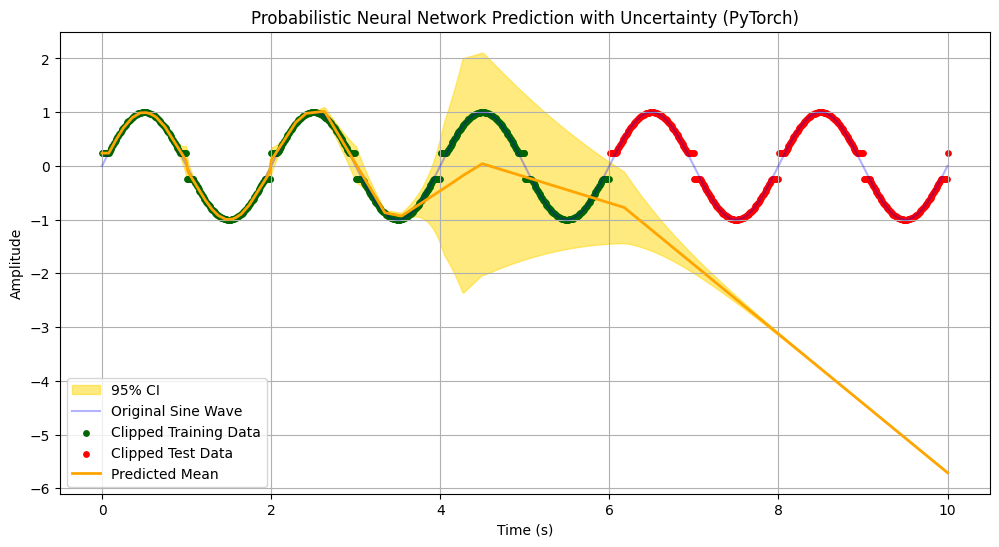

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Normal
from torch.utils.data import DataLoader, TensorDataset

# ---------------------------
# 1. Generate sine-wave data
# ---------------------------
num_points = 1000
freq = 0.5
amplitude = 1
sampling_rate = 100

t = np.linspace(0, num_points / sampling_rate, num_points, dtype=np.float32)
y = amplitude * np.sin(2 * np.pi * freq * t).astype(np.float32)

dataset = pd.DataFrame({"time": t, "value": y})

# ------------------------------------------
# 2. Clip values between -0.25 and 0.25
# ------------------------------------------
def clip_to_nearest_boundary(val, lower=-0.25, upper=0.25):
    if lower <= val <= upper:
        return lower if abs(val - lower) < abs(val - upper) else upper
    else:
        return val

dataset["value_clipped"] = dataset["value"].apply(clip_to_nearest_boundary)

# ------------------------------------------
# 3. Train/Test Split
# ------------------------------------------
SPLIT_RATIO = 0.6
X = dataset[["time"]].values
y_clipped = dataset["value_clipped"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y_clipped, test_size=(1-SPLIT_RATIO), shuffle=False
)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1).to(device)
X_test_t = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1).to(device)

train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ------------------------------------------
# 4. Define Probabilistic Model
# ------------------------------------------
class Model1(nn.Module):
    """Takes n input features -> outputs mu_1..mu_m, sigma_1..sigma_m"""
    def __init__(self, input_dim, output_dim, hidden_dim=32):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2 * output_dim)
        )

    def forward(self, inputs):
        out = self.fc(inputs)
        mu, log_sigma = torch.chunk(out, 2, dim=-1)
        sigma = F.softplus(log_sigma) + 1e-6
        return mu, sigma

model = Model1(input_dim=1, output_dim=1, hidden_dim=32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ------------------------------------------
# 5. Training Loop
# ------------------------------------------
epochs = 10000
best_val_loss = float('inf')
patience = 50
patience_counter = 0

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        mu, sigma = model(xb)
        dist = Normal(mu, sigma)
        nll_loss = -dist.log_prob(yb).mean()

        optimizer.zero_grad()
        nll_loss.backward()
        optimizer.step()
        train_loss += nll_loss.item() * xb.size(0)
    
    train_loss /= len(train_loader.dataset)
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}, NLL Loss: {train_loss:.4f}")

# ------------------------------------------
# 6. Predict & Visualize Uncertainty
# ------------------------------------------
model.eval()
with torch.no_grad():
    X_all_t = torch.tensor(X, dtype=torch.float32).to(device)
    mu_pred, sigma_pred = model(X_all_t)
    mu_pred = mu_pred.cpu().numpy().flatten()
    sigma_pred = sigma_pred.cpu().numpy().flatten()

lower_bound = mu_pred - 1.96 * sigma_pred
upper_bound = mu_pred + 1.96 * sigma_pred

dataset["pred_mean"] = mu_pred
dataset["lower_bound"] = lower_bound
dataset["upper_bound"] = upper_bound

plt.figure(figsize=(12, 6))
plt.fill_between(dataset["time"], dataset["lower_bound"], dataset["upper_bound"], color='gold', alpha=0.5, label="95% CI")
plt.plot(dataset["time"], dataset["value"], label="Original Sine Wave", color='blue', alpha=0.3)
plt.scatter(X_train.flatten(), y_train, color='darkgreen', s=15, label="Clipped Training Data")
plt.scatter(X_test.flatten(), y_test, color='red', s=15, label="Clipped Test Data")
plt.plot(dataset["time"], dataset["pred_mean"], color='orange', linewidth=2, label="Predicted Mean")
plt.title("Probabilistic Neural Network Prediction with Uncertainty (PyTorch)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


Decision Tree Test MSE: 1.4209


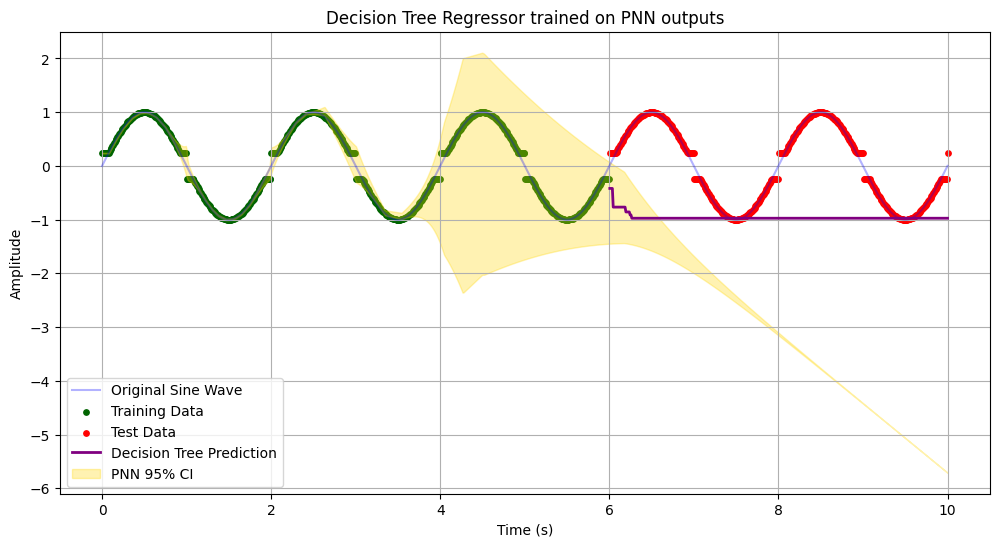

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Prepare features for the tree
# -----------------------------
# Use predicted mean and predicted sigma as features
X_tree = np.vstack([dataset["pred_mean"]]).T
y_tree = dataset["value_clipped"].values

# Split according to previous train/test split
split_idx = len(X_train)
X_tree_train, X_tree_test = X_tree[:split_idx], X_tree[split_idx:]
y_tree_train, y_tree_test = y_tree[:split_idx], y_tree[split_idx:]

# -----------------------------
# 2. Train Decision Tree Regressor
# -----------------------------
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_tree_train, y_tree_train)

# -----------------------------
# 3. Predict & evaluate
# -----------------------------
y_pred_tree = tree.predict(X_tree_test)
mse = mean_squared_error(y_tree_test, y_pred_tree)
print(f"Decision Tree Test MSE: {mse:.4f}")

# -----------------------------
# 4. Visualize
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(dataset["time"], dataset["value"], label="Original Sine Wave", color='blue', alpha=0.3)
plt.scatter(dataset["time"][:split_idx], y_tree_train, color='darkgreen', s=15, label="Training Data")
plt.scatter(dataset["time"][split_idx:], y_tree_test, color='red', s=15, label="Test Data")
plt.plot(dataset["time"][split_idx:], y_pred_tree, color='purple', linewidth=2, label="Decision Tree Prediction")
plt.fill_between(dataset["time"], dataset["lower_bound"], dataset["upper_bound"], color='gold', alpha=0.3, label="PNN 95% CI")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Decision Tree Regressor trained on PNN outputs")
plt.legend()
plt.grid(True)
plt.show()
